### Created by Kaiwei Ang (Lance)

In [2]:
import pandas as pd
import numpy as np

In [3]:
SMM = pd.read_csv("SMM.csv")

In [4]:
SMM.describe()

,ID Number,Duration,Mbr1,Mbr2,Discount,PayMthd,SalesChannel,CSI,Offer on 1st Ren Notice,NoEmail,...,Demo1,Number of key people on record,NumVst,Dinos Magazine in mail,Space Magazine in mail,Email notification about level price change,Mail notification about level price change,Eaddress acquisition postcard,Distance to SMM,Renew
count,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,...,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,9548.000000,8570.000000
mean,6785267.817344,364.505760,1.208944,1.080121,0.317868,2.121177,1.383745,0.389610,0.713553,0.153540,...,3.312107,1.756284,2.719732,0.173544,0.894219,0.037495,0.005341,0.058651,72.009127,0.116686
std,714477.091504,10.854218,0.406576,0.271495,0.465672,1.603873,0.669086,1.096795,0.452125,0.360526,...,1.771837,0.429346,2.063565,0.378737,0.307574,0.189981,0.072893,0.234983,226.924006,0.321065
min,236764.000000,364.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.145862,0.000000
25%,6883117.000000,364.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,13.936759,0.000000
50%,6937310.000000,364.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,21.290407,0.000000
75%,6990212.000000,364.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,...,4.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.953869,0.000000
max,7401876.000000,729.000000,2.000000,2.000000,1.000000,8.000000,4.000000,5.000000,1.000000,1.000000,...,12.000000,2.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3968.000000,1.000000


In [5]:
#Constructing Train and Test set
cmpr = pd.isnull(SMM["Renew"])
print(cmpr[cmpr==0].shape)
TrainSMM = SMM[cmpr==0][SMM.columns[1:-1]]
TestSMM = SMM[cmpr==1][SMM.columns[1:-1]]
train_label = SMM[cmpr==0]["Renew"]
print(TrainSMM.shape)
print(TestSMM.shape)
print(train_label.shape)

(8570,)
(8570, 21)
(978, 21)
(8570,)


##### Something to keep in mind is, getting high accuracy from classifiers doesn't mean much here, it's likely to be a poor model since we have very little positive samples if comapred to negative samples. That is, even I now predict every single member will not renew (negative), I'll still get very high accuracy, which is ~88.3%. Hence, in order to determine how a model performs, we need to know its recall rate, precision, as well as F1 score. 

### First Attempt: Direct Use of Random Forest classifier

In [6]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
scores = cross_validation.cross_val_score(alg, TrainSMM, train_label, cv=3)
print(scores)
print("Accuracy:",scores.mean())

[ 0.88313506  0.88340336  0.88340336]
Accuracy: 0.88331392739


The accuracy looks great but it could be a bad model, thus we need to know the recall rate and others. Too bad, cross_validation.cross_val_score doesn't tell us about them.

### Second Attempt Part 1: Random Forest Classifier (Longer way but more informative)

In [103]:
from sklearn.cross_validation import KFold

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
kf = KFold(TrainSMM.shape[0], n_folds=3, random_state=1)

Train_temp = TrainSMM.reset_index(drop=True)
train_label_temp = train_label.reset_index(drop=True)
predictions = []
for train, test in kf:
    train_set = Train_temp.loc[train]
    labels = train_label_temp.loc[train]
    print(train_set.shape, labels.shape, labels.unique())
    alg.fit(train_set,labels)
    test_pred = alg.predict(Train_temp.loc[test])
    predictions.append(test_pred)
    print(labels.index.min(),labels.index.max())
    test_lab = train_label_temp.loc[test]
    print(test_lab.index.min(),test_lab.index.max())

(5713, 21) (5713,) [ 0.  1.]
2857 8569
0 2856
(5713, 21) (5713,) [ 1.  0.]
0 8569
2857 5713
(5714, 21) (5714,) [ 1.  0.]
0 5713
5714 8569


In [104]:
predictions = np.concatenate(predictions, axis=0)
acc = sum(predictions == train_label)/len(train_label)
print("Accuracy:",acc)

Accuracy: 0.883080513419


In [105]:
#splitting up positive and negative set to compute recall rate.
pos_set = train_label_temp[train_label_temp==1]
neg_set = train_label_temp[train_label_temp==0]
print(pos_set.index.max(),neg_set.index.max())

pos_pred = predictions[pos_set.index]
neg_pred = predictions[neg_set.index]
print(pos_set.shape, pos_pred.shape)
print(neg_set.shape, neg_pred.shape)

TP = sum(pos_pred == pos_set)/len(pos_set)
TN = sum(neg_pred == neg_set)/len(neg_set)
Prec = sum(pos_pred == pos_set)/(sum(pos_pred == pos_set)+sum(neg_pred != neg_set))
print("TP rate:",TP)
print("TN rate:",TN)
print("Precision:",Prec)

8561 8569
(1000,) (1000,)
(7570,) (7570,)
TP rate: 0.003
TN rate: 0.999339498018
Precision: 0.375


As expected, the recall/true positive rate is very poor. The model literally predicted almost all the members will not renew. That's also why the accuracy is high but misleading.

### Instead of Cross Validation, Here's Another Approach, Randomly Select n Samples For Training

In [127]:
import random

pos = Train_temp[train_label_temp==1]
neg = Train_temp[train_label_temp==0]
print(pos.shape)
print(neg.shape)

train_pos_idx = random.sample(list(pos.index),800)
train_neg_idx = random.sample(list(neg.index),800)
print(len(train_pos_idx))
print(len(train_neg_idx))

test_pos_idx = list(set(list(pos.index)) - set(train_pos_idx))
test_neg_idx = list(set(list(neg.index)) - set(train_neg_idx))
print(len(test_pos_idx))
print(len(test_neg_idx))

train_idx = train_pos_idx + train_neg_idx
test_idx = test_pos_idx + test_neg_idx
print(len(train_idx), len(test_idx))

(1000, 21)
(7570, 21)
800
800
200
6770
1600 6970


In [128]:
alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
alg.fit(Train_temp.loc[train_idx], train_label_temp.loc[train_idx])
predictions = alg.predict(Train_temp.loc[test_idx])
print(predictions.shape)
print(np.unique(predictions))

cmpr = predictions == train_label_temp.loc[test_idx]
print("Accuracy:",sum(cmpr)/len(predictions))

(6970,)
[ 0.  1.]
Accuracy: 0.617360114778


In [129]:
train_label_test = train_label_temp.loc[test_idx]
pos_label = train_label_test[train_label_test==1]
neg_label = train_label_test[train_label_test==0]

print(train_label_test.shape, pos_label.shape, neg_label.shape)
print(sum(train_label_test.index == test_idx))

pred_df = pd.Series(predictions, index=train_label_test.index) #convert numpy array to pandas series 
pos_pred = pred_df[pos_label.index]
neg_pred = pred_df[neg_label.index]
print(neg_set.shape, neg_pred.shape)

TP = sum(pos_pred == pos_label)/pos_label.shape[0]
TN = sum(neg_pred == neg_label)/neg_label.shape[0]
Prec = sum(pos_pred == pos_label)/(sum(pos_pred == pos_label)+sum(neg_pred != neg_label))
FM = 2*Prec*TP/(Prec+TP)
CM = np.matrix([[sum(pos_pred == pos_label), sum(pos_pred != pos_label)], 
               [sum(neg_pred != neg_label), sum(neg_pred == neg_label)]])

print("TP rate:",TP)
print("TN rate:", TN)
print("Precision:", Prec)
print("F1 score:", FM)
print("Confusion matrix:")
print(CM)

(6970,) (200,) (6770,)
6970
(7570,) (6770,)
TP rate: 0.58
TN rate: 0.618463810931
Precision: 0.0429788810671
F1 score: 0.0800275957227
Confusion matrix:
[[ 116   84]
 [2583 4187]]


#### It seems like the rates vary with the number training samples. Hence, I make the previous codes into a function and run it multiple times with different number of training samples. The results are visualized. 

In [215]:
# n = number of training sample from pos and neg set
# algorithm = type of classifier 
def Classify(n,algorithm): 
    pos = Train_temp[train_label_temp==1]
    neg = Train_temp[train_label_temp==0]
    train_pos_idx = random.sample(list(pos.index),n)
    #train_neg_idx = random.sample(list(neg.index),int(n/len(pos)*len(neg)))
    train_neg_idx = random.sample(list(neg.index),n)
    test_pos_idx = list(set(list(pos.index)) - set(train_pos_idx))
    test_neg_idx = list(set(list(neg.index)) - set(train_neg_idx))
    train_idx = train_pos_idx + train_neg_idx
    test_idx = test_pos_idx + test_neg_idx

    alg = algorithm
    alg.fit(Train_temp.loc[train_idx], train_label_temp.loc[train_idx])
    predictions = alg.predict(Train_temp.loc[test_idx])
    cmpr = predictions == train_label_temp.loc[test_idx]
    acc = sum(cmpr)/len(predictions)

    train_label_test = train_label_temp.loc[test_idx]
    pos_label = train_label_test[train_label_test==1]
    neg_label = train_label_test[train_label_test==0]

    pred_df = pd.Series(predictions, index=train_label_test.index) #convert numpy array to pandas series 
    pos_pred = pred_df[pos_label.index]
    neg_pred = pred_df[neg_label.index]

    TP = sum(pos_pred == pos_label)/pos_label.shape[0]
    TN = sum(neg_pred == neg_label)/neg_label.shape[0]
    Prec = sum(pos_pred == pos_label)/(sum(pos_pred == pos_label)+sum(neg_pred != neg_label))
    FM = 2*Prec*TP/(Prec+TP)
    CM = np.matrix([[sum(pos_pred == pos_label), sum(pos_pred != pos_label)], 
                   [sum(neg_pred != neg_label), sum(neg_pred == neg_label)]])
    
    return TP,TN,Prec,FM,acc

In [216]:
#running the function multiple times 
TP_list = []
TN_list = []  
Prec_list = []
FM_list = []
acc_list = []
n_list = list(range(100,1000,100))
for n in n_list:
    TP,TN,Prec,FM,acc = Classify(n,
                        RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2))
    TP_list.append(TP)
    TN_list.append(TN)
    Prec_list.append(Prec)
    FM_list.append(FM)
    acc_list.append(acc)

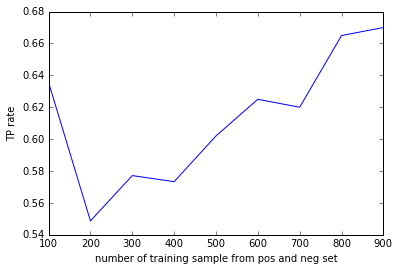

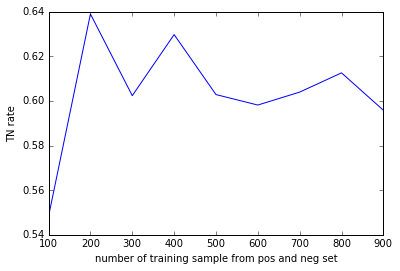

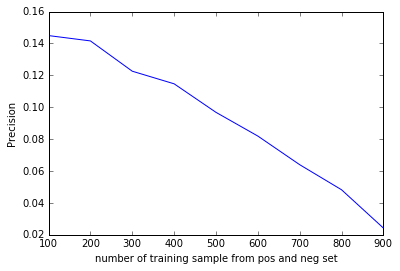

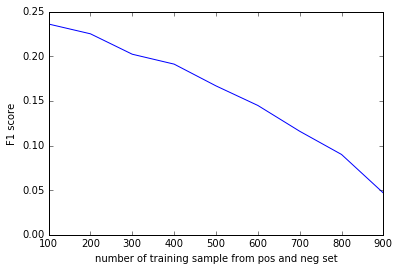

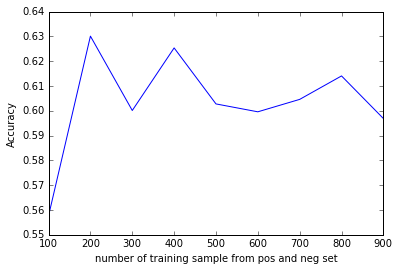

In [217]:
#Visualizations 
plt.plot(n_list,TP_list)
plt.xlabel('number of training sample from pos and neg set')
plt.ylabel('TP rate')
plt.show()
plt.plot(n_list,TN_list)
plt.xlabel('number of training sample from pos and neg set')
plt.ylabel('TN rate')
plt.show()
plt.plot(n_list,Prec_list)
plt.xlabel('number of training sample from pos and neg set')
plt.ylabel('Precision')
plt.show()
plt.plot(n_list,FM_list)
plt.xlabel('number of training sample from pos and neg set')
plt.ylabel('F1 score')
plt.show()
plt.plot(n_list,acc_list)
plt.xlabel('number of training sample from pos and neg set')
plt.ylabel('Accuracy')
plt.show()

### Check the distribution of positive and negative set

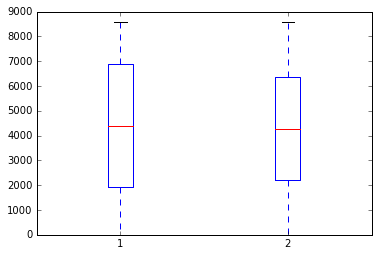

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.boxplot([pos_label.index, neg_label.index])
plt.show()

In [99]:
kf = KFold(TrainSMM.shape[0], n_folds=3, random_state=1)
for train, test in kf:
    tr = train_label_temp.loc[train]
    te = train_label_temp.loc[test]
    print(train.min(), train.max())
    print(test.min(), test.max())
    print(sum(tr == 1),sum(tr == 0))
    print(sum(te == 1),sum(te == 0))
    print("\n")

2857 8569
0 2856
630 5083
370 2487


0 8569
2857 5713
754 4959
246 2611


0 5713
5714 8569
616 5098
384 2472




It seems like the distribution of positive and negative set are quite even. 

### Third Attempt: Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression

TP,TN,Prec,FM,acc = Classify(700,LogisticRegression())

print(TP,TN,Prec,FM,acc)
print(CM)

0.583333333333 0.642066957787 0.0664388762339 0.119291070211 0.639609483961
[[ 163  137]
 [2159 4711]]


In [219]:
alg = LogisticRegression()
scores = cross_validation.cross_val_score(alg, TrainSMM, train_label, cv=3)
print(scores)
print(scores.mean())

[ 0.88208537  0.88235294  0.8837535 ]
0.882730605655


### Finding The Best Features

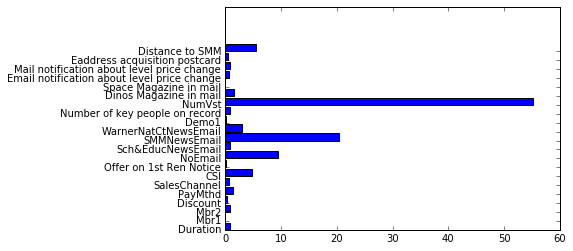

In [192]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
%matplotlib inline 

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(TrainSMM, train_label)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.barh(range(len(TrainSMM.columns.values)), scores)
plt.yticks(range(len(TrainSMM.columns.values)), TrainSMM.columns.values, rotation='horizontal')
plt.show()

In [194]:
#Select the six best features
predictors = ["NumVst","SMMNewsEmail","NoEmail","Distance to SMM","CSI","WarnerNatCtNewsEmail"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
scores = cross_validation.cross_val_score(alg, TrainSMM[predictors], train_label, cv=3)
print(scores)
print("Accuracy:",scores.mean())

[ 0.87718684  0.87710084  0.86729692]
Accuracy: 0.87386153435


### Use the six best features only

In [201]:
pos = Train_temp[train_label_temp==1]
neg = Train_temp[train_label_temp==0]
n=700
train_pos_idx = random.sample(list(pos.index),n)
#train_neg_idx = random.sample(list(neg.index),int(n/len(pos)*len(neg)))
train_neg_idx = random.sample(list(neg.index),n)
test_pos_idx = list(set(list(pos.index)) - set(train_pos_idx))
test_neg_idx = list(set(list(neg.index)) - set(train_neg_idx))
train_idx = train_pos_idx + train_neg_idx
test_idx = test_pos_idx + test_neg_idx

#alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)
alg = LogisticRegression()
alg.fit(Train_temp[predictors].loc[train_idx], train_label_temp.loc[train_idx])
predictions = alg.predict(Train_temp[predictors].loc[test_idx])
cmpr = predictions == train_label_temp.loc[test_idx]
acc =  sum(cmpr)/len(predictions)

train_label_test = train_label_temp.loc[test_idx]
pos_label = train_label_test[train_label_test==1]
neg_label = train_label_test[train_label_test==0]

pred_df = pd.Series(predictions, index=train_label_test.index) #convert numpy array to pandas series 
pos_pred = pred_df[pos_label.index]
neg_pred = pred_df[neg_label.index]

TP = sum(pos_pred == pos_label)/pos_label.shape[0]
TN = sum(neg_pred == neg_label)/neg_label.shape[0]
Prec = sum(pos_pred == pos_label)/(sum(pos_pred == pos_label)+sum(neg_pred != neg_label))
FM = 2*Prec*TP/(Prec+TP)
CM = np.matrix([[sum(pos_pred == pos_label), sum(pos_pred != pos_label)], 
                   [sum(neg_pred != neg_label), sum(neg_pred == neg_label)]])

print(TP,TN,Prec,FM,acc)
print(CM)

0.543333333333 0.685735080058 0.0701981050818 0.124332570557 0.679776847978
[[ 163  137]
 [2159 4711]]
